In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import yaml
from yaml.loader import SafeLoader
import os
import warnings
import pickle
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

warnings.filterwarnings('ignore')

In [2]:
# Cambiamos el directorio de trabajo a la carpeta models
os.chdir('../../')

In [3]:
print("Directorio: {0}".format(os.getcwd()))

Directorio: /Users/mohamed.rios/Projects/desafio_etermax/models


# Leemos archivo de parámetros

In [4]:
with open('resources.yaml') as f:
    resources = yaml.load(f, Loader=SafeLoader)
    params = resources.get('preprocess_params')
    models_path = resources.get('models_path')

# Carga de modelos y datos

In [5]:
models = []
for model in models_path:
    with open(model,'rb') as infile:
        models.append(pickle.load(infile))

In [6]:
x_test = pd.read_csv(params['x_test_path'])
y_test = pd.read_csv(params['y_test_path'])

# Validaciones

In [7]:
for i in range(0, len(models_path)):
    print('*'*10)
    print('Para el modelo del path ', models_path[i], ' se obtuvieron las siguientes métricas:')
    predictions = models[i].predict(x_test)
    print('score: ', models[i].score(x_test, y_test['revenue']))
    print('mae: ', mean_absolute_error(predictions, y_test['revenue']))
    print('mse: ', mean_squared_error(predictions, y_test['revenue']))
    print('*'*10)
    print()

**********
Para el modelo del path  stg/model_1/artifacts/lr  se obtuvieron las siguientes métricas:
score:  0.8694330970535411
mae:  0.0375101975429109
mse:  0.005370428452513296
**********

**********
Para el modelo del path  stg/model_1/artifacts/xgb  se obtuvieron las siguientes métricas:
score:  0.9479153740896662
mae:  0.016421984924089205
mse:  0.002142325126927996
**********



<AxesSubplot:>

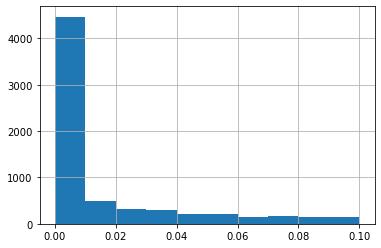

In [8]:
y_test[y_test['revenue'] < 0.1]['revenue'].hist()

In [9]:
y_test[y_test['revenue'] < 0.01]['revenue'].count()

4470

In [10]:
y_test[y_test['revenue'] >= 0.01]['revenue'].count()

4328

# Conclusiones

Se tomará el modelo de stg/model_1/artifacts/xgb para el deploy para este desafío pero se debería optimizar mucho más ya que el orden del error está en la misma magnitud o más de la que se encuentran la mayoría de valores del target.